<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/T_EfficientNetB0(3)_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [43]:
test_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Test"
train_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Train"
val_dir="/content/drive/MyDrive/Project_materials/CovidDataset/Val"

In [44]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras.callbacks import History 
from keras.applications import vgg16


In [45]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [46]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [47]:
   
nb_train_samples = len(train.filenames)  
nb_train_samples


8376

In [48]:
num_classes=len(train.class_indices)
num_classes

3

In [49]:
 from keras.utils.np_utils import to_categorical 
 # get the class lebels for the training data, in the original order  
 train_labels = train.classes  
   
 # convert the training labels to categorical vectors  
 train_labels = to_categorical(train_labels, num_classes=num_classes) 
 train_labels 

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [50]:
 validation_labels = validation.classes  
 validation_labels = to_categorical(validation_labels, num_classes=num_classes) 
 validation_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [55]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.7/dist-packages (1.1.1)


In [56]:

import efficientnet.keras as efn

In [57]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


In [58]:
for layer in base_model.layers:
    layer.trainable = False

In [59]:
from keras.layers import Dropout
from keras.layers import Input, Flatten, Dense
from keras.models import Model

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation="softmax")(x)
model_final = Model(base_model.input,predictions)

In [60]:
model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [61]:
model_final.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])


In [62]:

eff_history = model_final.fit(train, validation_data = validation, steps_per_epoch = 262, validation_steps=25 ,epochs = 10)

Epoch 1/10
262/262 [==============================] - 711s 3s/step - loss: 4.8663 - accuracy: 0.8345 - val_loss: 0.2211 - val_accuracy: 0.8400
Epoch 2/10
262/262 [==============================] - 694s 3s/step - loss: 0.2242 - accuracy: 0.9421 - val_loss: 0.2925 - val_accuracy: 0.9200
Epoch 3/10
262/262 [==============================] - 683s 3s/step - loss: 0.1599 - accuracy: 0.9451 - val_loss: 0.1668 - val_accuracy: 0.9200
Epoch 4/10
262/262 [==============================] - 681s 3s/step - loss: 0.1157 - accuracy: 0.9595 - val_loss: 0.2695 - val_accuracy: 0.8800
Epoch 5/10
262/262 [==============================] - 678s 3s/step - loss: 0.1620 - accuracy: 0.9479 - val_loss: 0.1696 - val_accuracy: 0.9200
Epoch 6/10
262/262 [==============================] - 674s 3s/step - loss: 0.1493 - accuracy: 0.9554 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 7/10
262/262 [==============================] - 678s 3s/step - loss: 0.1186 - accuracy: 0.9600 - val_loss: 0.2249 - val_accuracy: 0.9200

In [64]:
evaluation = model_final.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_final.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 721s 259ms/step - loss: 0.1729 - accuracy: 0.9556
Test Accuracy: 95.56%
262/262 [==============================] - 639s 2s/step - loss: 0.0491 - accuracy: 0.9838
Train Accuracy: 98.38%


In [65]:
from keras.utils.np_utils import to_categorical 
num_classes=len(test.class_indices)

test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np


# rounded_labels=np.argmax(test, axis=1)

pred = model_final.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.961625,0.903323,0.997805,0.952688,0.954251,0.954251
recall,0.916129,0.964516,0.977419,0.952688,0.952688,0.952688
f1-score,0.938326,0.932917,0.987507,0.952688,0.952917,0.952917
support,930.000000,930.000000,930.000000,0.952688,2790.000000,2790.000000


In [69]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[852  77   1]
 [ 32 897   1]
 [  2  19 909]]


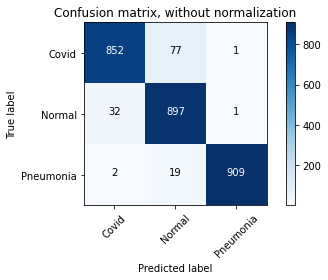

In [70]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Covid', 'Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')

Text(0.5, 1.0, 'Accuracy Evolution')

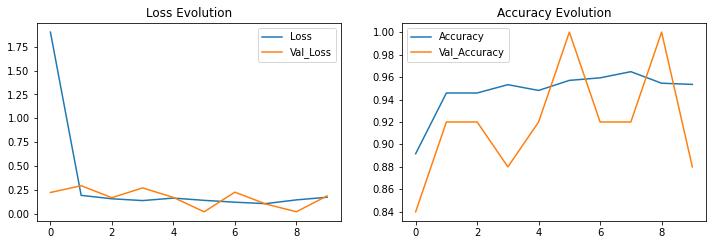

In [72]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(eff_history.history['loss'], label='Loss')
plt.plot(eff_history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(eff_history.history['accuracy'], label='Accuracy')
plt.plot(eff_history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')